In [1]:
# Install yfinance.
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 71.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [2]:
# Import dependencies.
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Setting the start date
today = datetime.now()
start_date = datetime(today.year-1 ,today.month ,today.day)
print(start_date)

2022-01-29 00:00:00


In [4]:
# Tickers for the companies used for data analysis
ticker_dist = {"Google": "GOOGL",
              "Microsoft":"MSFT",
              "Tesla":"TSLA",
              "Amazon":"AMZN",
              "Netflix":"NFLX",
              "Apple":"AAPL",
              "Facebook":"META"}


In [5]:
# Converting the data to csv.
for ticker in ticker_dist:
    filepath = ticker +".csv"
    globals()[ticker] = yf.download(ticker_dist[ticker], start=start_date, end=today)
    globals()[ticker].to_csv(filepath)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
# Reading the data from csv.
for ticker in ticker_dist:
    filepath = ticker +".csv"
    globals()[ticker] = pd.read_csv(filepath, index_col=0)
    ticker = globals()[ticker]
    

In [7]:
# all ticker name list for labels graph comparision.
labels=[]
for ticker in ticker_dist:
    labels.append(ticker)


In [8]:
# Displaying the labels.
labels

['Google', 'Microsoft', 'Tesla', 'Amazon', 'Netflix', 'Apple', 'Facebook']

In [9]:
# The ticker list for 7 companies.
ticker_list = ["GOOGL","MSFT","TSLA","META","AAPL","AMZN","NFLX"]

In [10]:
# Loading the data by grouping it by 'ticker'.
df = yf.download(ticker_list, start=start_date, end=today,group_by="ticker") 

[*********************100%***********************]  7 of 7 completed


In [11]:
# Converting the data to csv file.
filepath= "merged_df.csv"
df.to_csv(filepath)

In [12]:
# Display the dataframe.
df.head()

TSLA                                      \
                                 Open        High         Low       Close   
Date                                                                        
2022-01-31 00:00:00-05:00  290.903320  312.663330  287.350006  312.239990   
2022-02-01 00:00:00-05:00  311.736664  314.566681  301.666656  310.416656   
2022-02-02 00:00:00-05:00  309.393341  310.500000  296.470001  301.886658   
2022-02-03 00:00:00-05:00  294.000000  312.333344  293.506653  297.046661   
2022-02-04 00:00:00-05:00  299.073334  312.166656  293.723328  307.773346   

                                                        AAPL              \
                            Adj Close     Volume        Open        High   
Date                                                                       
2022-01-31 00:00:00-05:00  312.239990  104436000  170.160004  175.000000   
2022-02-01 00:00:00-05:00  310.416656   73138200  174.009995  174.839996   
2022-02-02 00:00:00-05:00  301.886658   66792900  174.750000  175.880005   
2022-02-03 00:00:00-05:00  297.046661   78855600  174.479996  176.240005   
2022-02-04 00:00:00-05:00  307.773346   73625400  171.679993  174.100006   

                                                   ...       GOOGL  \
                                  Low       Close  ...         Low   
Date                                               ...               
2022-01-31 00:00:00-05:00  169.509995  174.779999  ...  132.209503   
2022-02-01 00:00:00-05:00  172.309998  174.610001  ...  134.368500   
2022-02-02 00:00:00-05:00  173.330002  175.839996  ...  145.522507   
2022-02-03 00:00:00-05:00  172.119995  172.899994  ...  142.665497   
2022-02-04 00:00:00-05:00  170.679993  172.389999  ...  140.514999   

                                                                    MSFT  \
                                Close   Adj Close     Volume        Open   
Date                                                                       
2022-01-31 00:00:00-05:00  135.303497  135.303497   39986000  308.950012   
2022-02-01 00:00:00-05:00  137.643997  137.643997   68644000  310.410004   
2022-02-02 00:00:00-05:00  148.000000  148.000000  123200000  309.630005   
2022-02-03 00:00:00-05:00  143.089996  143.089996   71518000  309.489990   
2022-02-04 00:00:00-05:00  143.292999  143.292999   57998000  300.209991   

                                                                           \
                                 High         Low       Close   Adj Close   
Date                                                                        
2022-01-31 00:00:00-05:00  312.380005  306.369995  310.980011  308.093140   
2022-02-01 00:00:00-05:00  310.630005  305.130005  308.760010  305.893738   
2022-02-02 00:00:00-05:00  315.119995  308.880005  313.459991  310.550079   
2022-02-03 00:00:00-05:00  311.230011  299.959991  301.250000  298.453430   
2022-02-04 00:00:00-05:00  308.799988  299.970001  305.940002  303.099915   

                                     
                             Volume  
Date                                 
2022-01-31 00:00:00-05:00  46444500  
2022-02-01 00:00:00-05:00  40950400  
2022-02-02 00:00:00-05:00  36636000  
2022-02-03 00:00:00-05:00  43730000  
2022-02-04 00:00:00-05:00  35096500  

[5 rows x 42 columns]

In [13]:
# Displaying information for merged_df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-01-31 00:00:00-05:00 to 2023-01-27 00:00:00-05:00
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (TSLA, Open)        250 non-null    float64
 1   (TSLA, High)        250 non-null    float64
 2   (TSLA, Low)         250 non-null    float64
 3   (TSLA, Close)       250 non-null    float64
 4   (TSLA, Adj Close)   250 non-null    float64
 5   (TSLA, Volume)      250 non-null    int64  
 6   (AAPL, Open)        250 non-null    float64
 7   (AAPL, High)        250 non-null    float64
 8   (AAPL, Low)         250 non-null    float64
 9   (AAPL, Close)       250 non-null    float64
 10  (AAPL, Adj Close)   250 non-null    float64
 11  (AAPL, Volume)      250 non-null    int64  
 12  (META, Open)        250 non-null    float64
 13  (META, High)        250 non-null    float64
 14  (META, Low)         250 non-null    float64
 15  (META, C

In [14]:
# Loading the data from csv files.
google_df = pd.read_csv("Google.csv")
Amazon_df = pd.read_csv("Amazon.csv")
Facebook_df = pd.read_csv("Facebook.csv")
Apple_df = pd.read_csv("Apple.csv")
Microsoft_df = pd.read_csv("Microsoft.csv")
Netflix_df = pd.read_csv("Netflix.csv")
Tesla_df = pd.read_csv("Tesla.csv")

In [15]:
# Checking the information for google_df
Apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [16]:
# Converting the date column to date type.
Apple_df['Date'] = pd.to_datetime(Apple_df['Date'], utc=True)


In [17]:
# Checking data types to confirm the change.
Apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       250 non-null    datetime64[ns, UTC]
 1   Open       250 non-null    float64            
 2   High       250 non-null    float64            
 3   Low        250 non-null    float64            
 4   Close      250 non-null    float64            
 5   Adj Close  250 non-null    float64            
 6   Volume     250 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 13.8 KB


In [18]:
Apple_df = Apple_df.set_index('Date')
Apple_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-31 05:00:00+00:00,170.160004,175.000000,169.509995,174.779999,173.771469,115541600
2022-02-01 05:00:00+00:00,174.009995,174.839996,172.309998,174.610001,173.602448,86213900
2022-02-02 05:00:00+00:00,174.750000,175.880005,173.330002,175.839996,174.825363,84914300
2022-02-03 05:00:00+00:00,174.479996,176.240005,172.119995,172.899994,171.902313,89418100
2022-02-04 05:00:00+00:00,171.679993,174.100006,170.679993,172.389999,171.613632,82465400


In [19]:
Apple_df['High_Low_per'] = (Apple_df['High'] - Apple_df['Low']) / Apple_df['Low']*100


In [20]:
Apple_df['Per_change'] = (Apple_df['Open'] - Apple_df['Close']) / Apple_df['Close']*100

In [21]:
Apple_df = Apple_df[['Adj Close','High_Low_per','Per_change','Volume']]

In [22]:
import math

In [23]:
forecast_ceil = int(math.ceil(0.001*len(Apple_df)))

In [24]:
label_col = 'Adj Close'

In [25]:
Apple_df['label'] = Apple_df[label_col].shift(-forecast_ceil)

In [26]:
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as preprocessing

import matplotlib.pyplot as plt
from matplotlib import style

In [27]:
#feaures X, labels Y
X = np.array(Apple_df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_ceil:]
X_lately = X[-forecast_ceil:] #no y value

In [28]:
Apple_df.dropna(inplace=True)

In [29]:
y = np.array(Apple_df['label'])

In [30]:
len(X)

249

In [31]:
len(y)

249

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [33]:
clf = SVR(kernel='rbf')

In [34]:
clf.fit(X_train, y_train) #train

SVR()

In [35]:
accuracy = clf.score(X_test, y_test) #test Accuracy 


In [36]:
print(accuracy) #directionally accurate

0.7796785641357726


In [37]:
forecast_set = clf.predict(X_lately) #pass a single value or array

In [38]:
print(forecast_set, accuracy) # stockprices next 30 days

[145.24039887] 0.7796785641357726


In [39]:
Apple_df['Forecast'] = np.nan

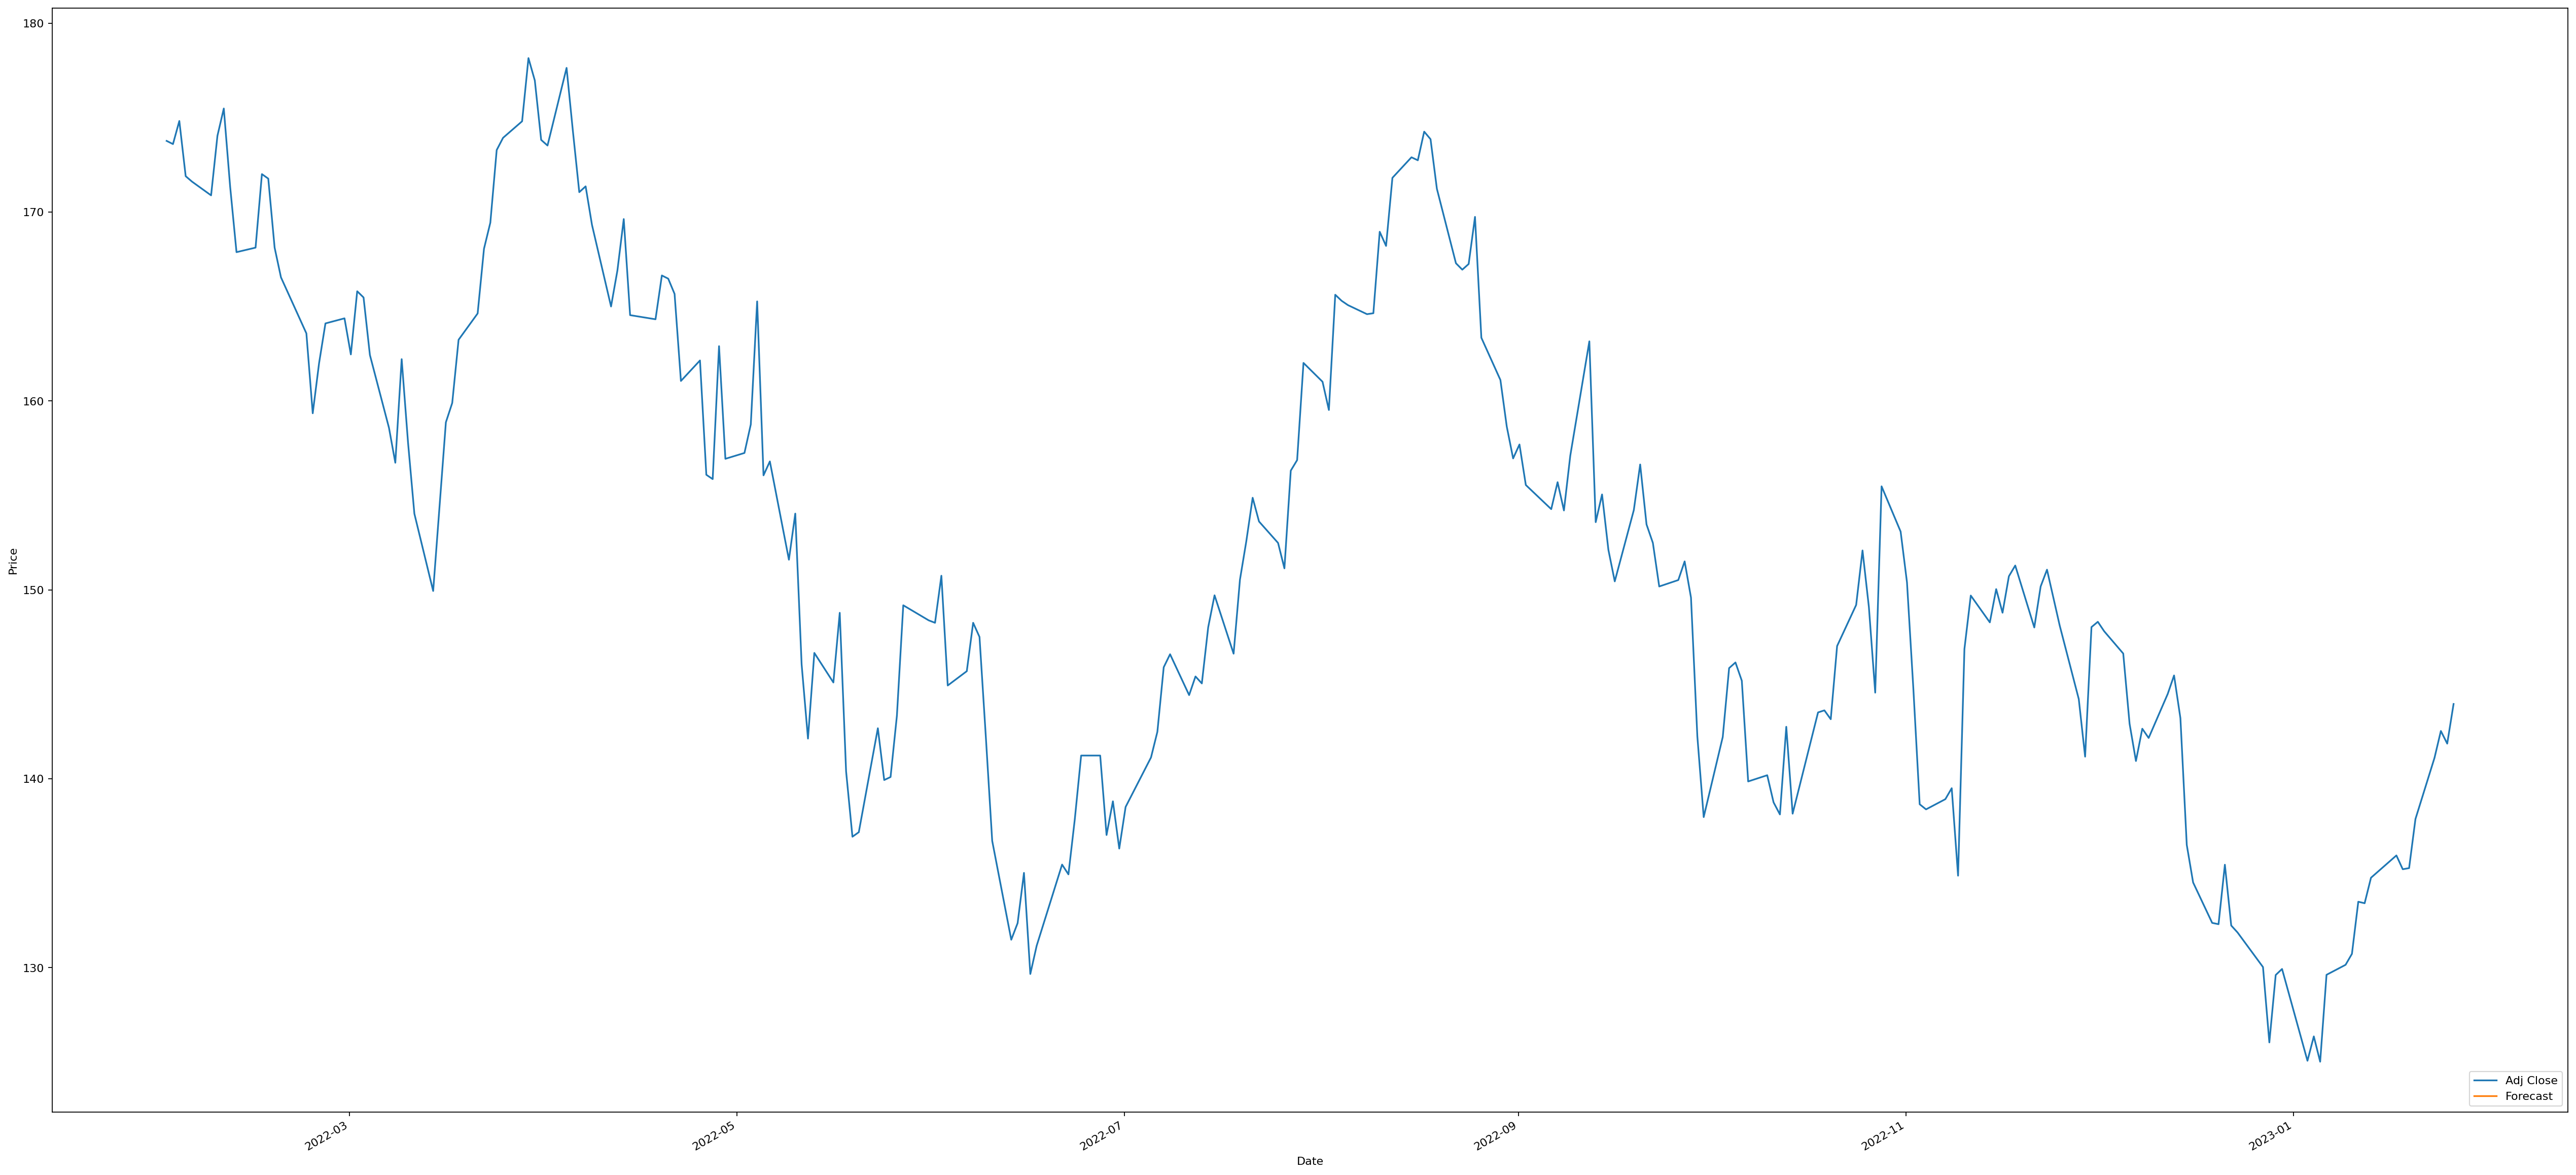

In [40]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(40, 20), dpi=160, facecolor='w', edgecolor='k')
Apple_df['Adj Close'].plot()
Apple_df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()